In [38]:
import sympy as sym
import sympy.plotting as symplot2
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
from IPython.display import display, Math
import sympy.plotting.plot as symplot
from scipy.signal import find_peaks

# Computing Limits

In [5]:
x = sym.symbols('x')
fx = x**3

lim_pnt = 1.5
lim = sym.limit(fx, x, lim_pnt)

print(lim, lim_pnt**3)

display(Math('\\lim_{x\\to %g} %s = %g' %(lim_pnt, sym.latex(fx), lim)))

3.37500000000000 3.375


<IPython.core.display.Math object>

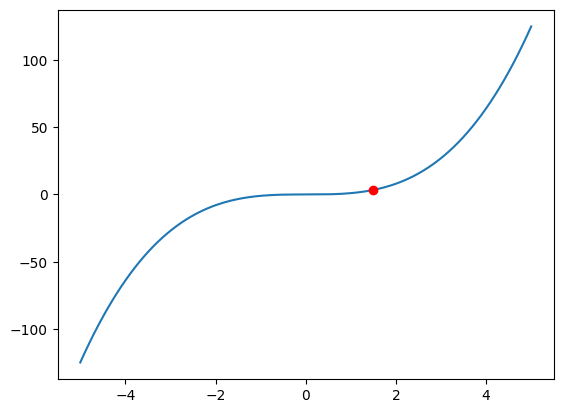

In [13]:
fxx = sym.lambdify(x, fx)
fxx(2)

xx = np.linspace(-5, 5, 200)

plt.plot(xx, fxx(xx))
plt.plot(lim_pnt, lim, 'ro')
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

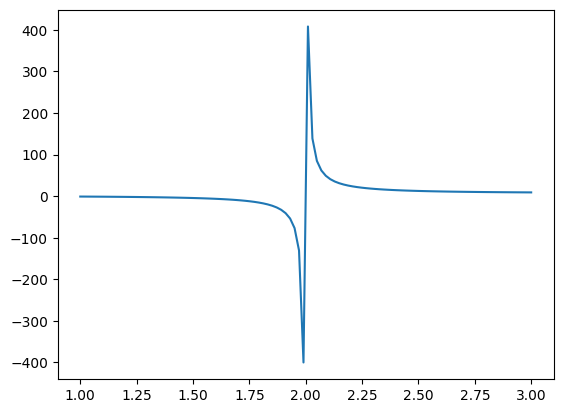

In [15]:
fx = (x**2)/(x-2)
fxx = sym.lambdify(x, fx)
xx = np.linspace(1, 3, 102)

lim_pnt = 2
lim_neg = sym.limit(fx, x, lim_pnt, dir='-')
lim_pos = sym.limit(fx, x, lim_pnt, dir='+')

plt.plot(xx, fxx(xx))
display(Math('\\lim_{x\\to %g^-} %s = %g' %(lim_pnt, sym.latex(fx), lim_neg)))
display(Math('\\lim_{x\\to %g^+} %s = %g' %(lim_pnt, sym.latex(fx), lim_pos)))

plt.show()

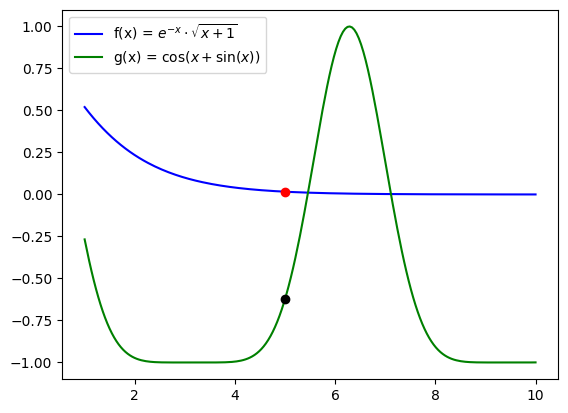

In [2]:
# f(x) = e^-x * sqrt(x + 1)
# g(x) = cos(x + sin(x))

x = sym.symbols('x')
fx = sym.exp(-x) * sym.sqrt(x + 1)
fxx = sym.lambdify(x, fx)
xx = np.linspace(1, 10, 200)

lim_pnt_fx = 5
lim_fx = sym.limit(fx, x, lim_pnt_fx)

plt.plot(xx, fxx(xx),'b',label='f(x) = $e^{-x} \\cdot \\sqrt{x + 1}$')
plt.plot(lim_pnt_fx, lim_fx, 'ro')

gx = sym.cos(x + sym.sin(x))
gxx = sym.lambdify(x, gx)
lim_pnt_gx = 5
lim_gx = sym.limit(gx, x, lim_pnt_gx)

plt.plot(xx, gxx(xx),'g',label='g(x) = $\\cos(x + \\sin(x))$')
plt.plot(lim_pnt_gx, lim_gx, 'ko')

plt.legend()
plt.show()

In [18]:
lim_pnt = 5

# compute the limit of f/g
hx = fx / gx
lim_fgx = sym.limit(hx, x, lim_pnt)

display(Math('\\frac{\\lim_{x \\to %g} f(x)}{\\lim_{x \\to %g} g(x)} = \\frac{%g}{%g} = %g' \
             %(lim_pnt, lim_pnt, lim_fx, lim_gx, lim_fx / lim_gx)))

display(Math('\\lim_{x \\to %g} \\frac{f(x)}{g(x)} = %g' %(lim_pnt, lim_fgx)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Piecewise Functions

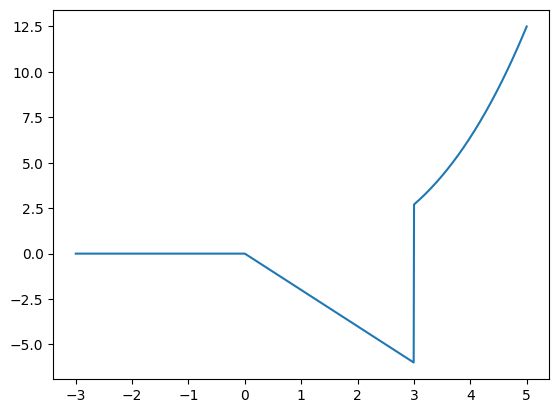

In [24]:
x = sym.symbols('x')

piece1 = 0
piece2 = -2*x
piece3 = x**3 / 10

fx = sym.Piecewise( (piece1, x < 0), (piece2, (x >= 0) & (x < 3)), (piece3, x >= 3) )
fx

fxx = sym.lambdify(x, fx)
xx = np.linspace(-3, 5, 1234)

plt.plot(xx, fxx(xx))
plt.show()

<IPython.core.display.Math object>

<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in log
  return select([less_equal(x, 0),True], [x**3,log(x)/log(2)], default=nan)
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Fo

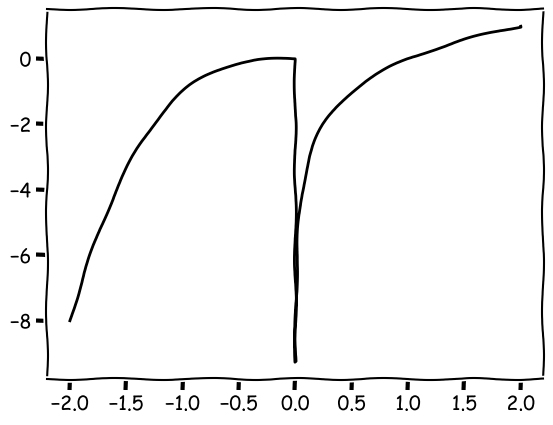

In [5]:
x = sym.symbols('x')
xx = np.linspace(-2, 2, 1234)

piece1 = x**3
piece2 = sym.log(x,2)

fx = sym.Piecewise( (piece1, x <= 0), (piece2, x > 0) )
display(Math('f(x) = ' + sym.latex(fx)))

fxx = sym.lambdify(x, fx)

with plt.xkcd():
  plt.plot(xx, fxx(xx), 'k')
plt.show()

# Derivatives

## Derivatives of Polynomials

In [9]:
# Derivative of a polynomial:
# df/dx*(a*x^n) = n*a*x^(n-1)

x = sym.symbols('x')
fx = x**2
dfx = sym.diff(fx)

# Leibniz notation
display(Math('f(x) = %s, \\quad \\frac{df}{dx} = %s' %(sym.latex(fx), sym.latex(dfx))))

# Lagrange notation
display(Math('f(x) = %s, \\quad f\' = %s' %(sym.latex(fx), sym.latex(dfx))))

# Newton notation
display(Math('f(x) = %s, \\quad \\dot{f} = %s' %(sym.latex(fx), sym.latex(dfx))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

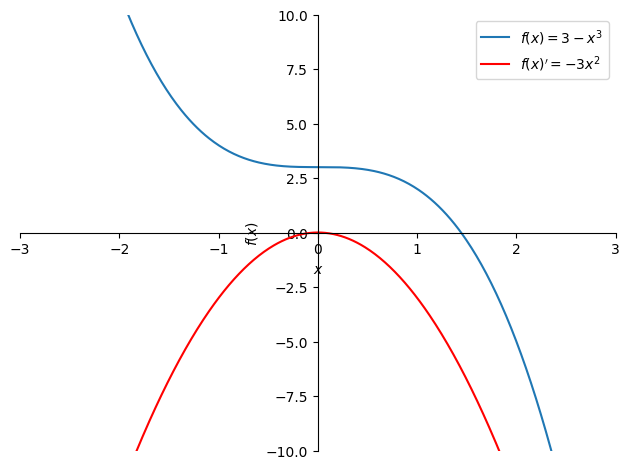

In [19]:
fx = 3 - x**3
range_x = (x,-5,5)
dfx = sym.diff(fx)

p = symplot(fx, range_x, show=False)
p.extend(symplot(sym.diff(fx), range_x, show=False))
p[1].line_color = 'r'
p[0].label = '$f(x) = %s$' %sym.latex(fx)
p[1].label = '$f(x)\' = %s$' %sym.latex(dfx)

p.legend = True
p.ylim = [-10,10]
p.xlim = [-3,3]
p.show()

In [14]:
# Summation rule:
# (f + g)' = f' + g'

# Product rule:
# (f * g)' = f' * g + f * g'
# (f * g)' != f' * g'

x = sym.symbols('x')

fx = 3 + 2*x - 5*x**2 + 7*x**4
gx = 4*x**2 + x**5

d_fx = sym.diff(fx)
d_gx = sym.diff(gx)
d_fx_plus_gx = sym.diff(fx + gx)
d_fx_times_gx = sym.diff(fx * gx)

display(Math('\\text{Without applying the product rule:}'))
display(Math('\\quad (f\\times g)\' = %s' %sym.latex(sym.expand(d_fx_times_gx))))
display(Math('\\quad f\'\\times g\' = %s' %sym.latex(sym.expand(d_fx*d_gx))))

display(Math('\\text{Applying the product rule:}'))
display(Math('\\quad (f\\times g)\' = %s' %sym.latex(sym.expand(d_fx_times_gx))))
display(Math('\\quad f\'\\times g + f\\times g\' = %s' %sym.latex(sym.expand(d_fx*gx + fx*d_gx))))

display(Math('\\text{With applying the sum rule:}'))
display(Math('\\quad (f + g)\' = %s' %sym.latex(sym.expand(d_fx_plus_gx))))
display(Math('\\quad f\' + g\' = %s' %sym.latex(sym.expand(d_fx + d_gx))))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Derivatives of Trig Functions

In [10]:
# Circular derivatives
# df/dx of cos(x) -> -sin(x)
# df/dx of -sin(x) -> -cos(x)
# df/dx of -cos(x) -> sin(x)
# df/dx of sin(x) -> cos(x)

q = sym.symbols('q')
fq = sym.cos(q)

for i in range(0, 5):
  display(Math('\\frac{d}{dx}[%s] = %s' %(sym.latex(fq), sym.latex(sym.diff(fq)))))
  fq = sym.diff(fq)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

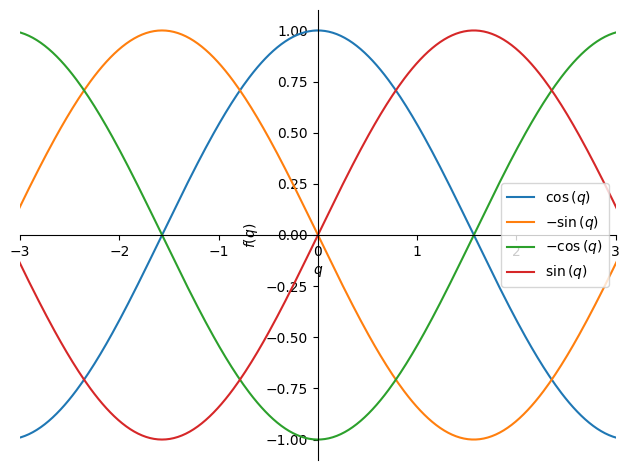

In [15]:
fq = sym.cos(q)

for i in range(0, 4):
  if i == 0:
    p = symplot(fq, show=False, label='$%s$' %sym.latex(fq))
  else:
    p.extend(symplot(fq, show=False, label='$%s$' %sym.latex(fq)))
  fq = sym.diff(fq)

p.legend = True
p.xlim = [-3,3]
p.show()

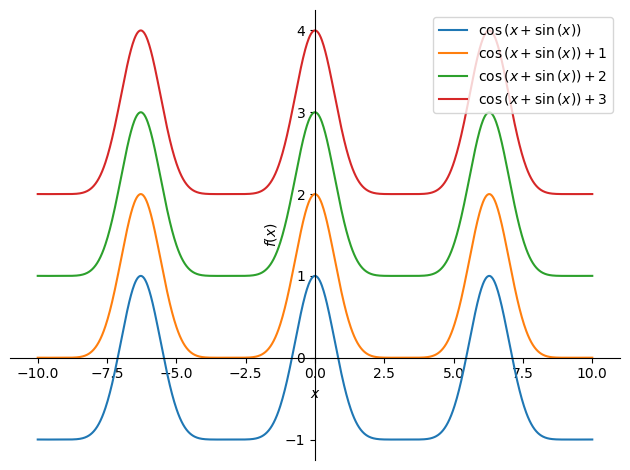

In [42]:
x,a = sym.symbols('x a')

f = sym.cos(x + sym.sin(x))
fax = f + a

for i in range(0, 4):
  if i == 0:
    p = symplot(fax.subs(a,i), show=False, label='$%s$' %sym.latex(fax.subs(a,i)))
  else:
    p.extend(symplot(fax.subs(a,i), show=False, label='$%s$' %sym.latex(fax.subs(a,i))))

p.legend = True
p.show()

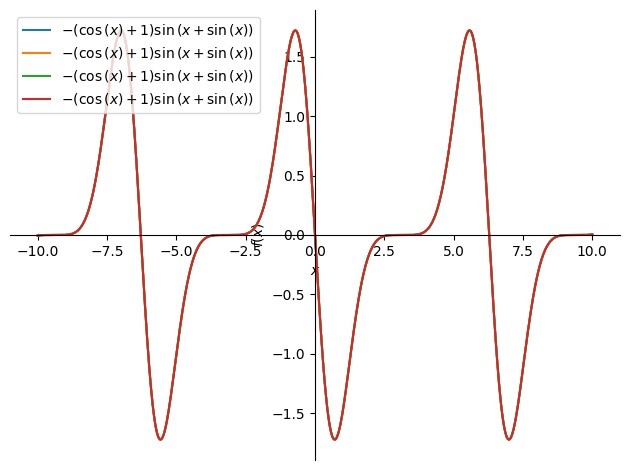

In [52]:
x,a = sym.symbols('x a')

f = sym.cos(x + sym.sin(x)) + a

for i in range(0, 4):
  fax = sym.diff(f.subs(a,i))
  if i == 0:
    p = symplot(fax, show=False, label='$%s$' %sym.latex(fax.subs(a,i)))
  else:
    p.extend(symplot(fax, show=False, label='$%s$' %sym.latex(fax.subs(a,i))))

# p.xlim = [-5,5]
p.legend = True
p.show()

## Tangent Lines

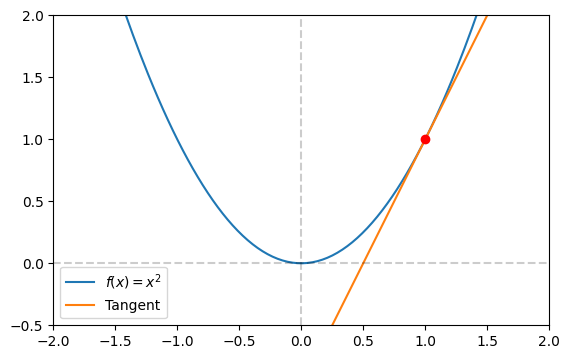

In [19]:
# tangentline = f'(a) * (x - xa) + f(a)
x = sym.symbols('x')

# define the function and its derivative
f = x**2
df = sym.diff(f)

# define the point of tangency
xa = 1

# get the function and derivative value at x_a
fa = f.subs(x, xa)
dfa = df.subs(x, xa)

xx = np.linspace(-2, 2, 200)
fun = sym.lambdify(x, f)(xx)
# df_fun = sym.lambdify(x, df)(xx)

# compute the tangent line
tanline = dfa*(xx - xa) + fa

plt.plot(xx, fun, label='$f(x) = x^2$')
plt.plot(xx, tanline, label='Tangent')
plt.plot(xa, fa, 'ro')

plt.legend()

plt.axis('square')
plt.axis([-2,2,-.5,2])

ax = plt.gca()
plt.plot(ax.get_xlim(), [0,0], 'k--', alpha=.2)
plt.plot([0,0], ax.get_ylim(), 'k--', alpha=.2)

plt.show()

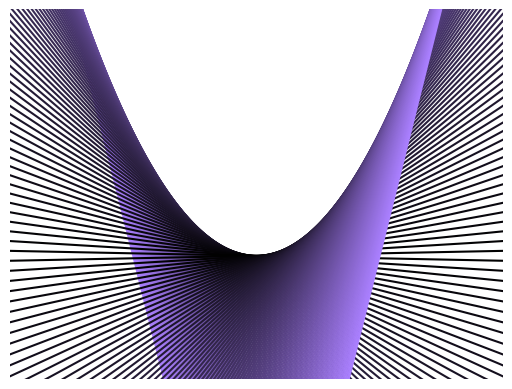

In [8]:
x = sym.symbols('x')

f = x**2
df = sym.diff(f)

xas = np.linspace(-2, 2, 200)

xx = np.linspace(-2, 2, 200)

for i in range(0, len(xas)):
  a = xas[i]
  fa = f.subs(x, a)
  dfa = df.subs(x, a)

  tanline = dfa*(xx - a) + fa
  plt.plot(xx, tanline, color=[abs(a)/3,abs(a)/4,abs(a)/2])

plt.axis('square')
plt.axis([-2,2,-1,2])
plt.axis('off')
plt.show()

# Finding Critical Points

In [9]:
x = sym.symbols('x')
fx = -x**4 + 3*x**2
dfx = sym.diff(fx)
dfx

-4*x**3 + 6*x

Critical points: [-1.  1.] [0.]


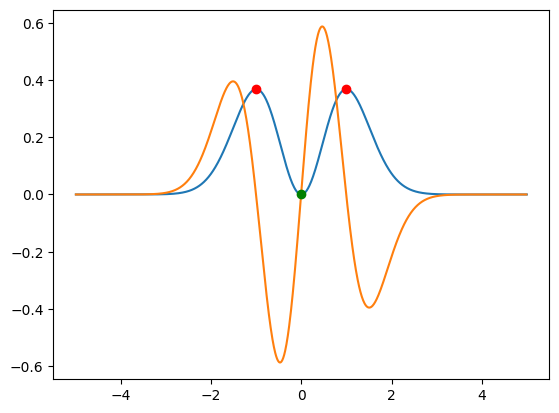

In [ ]:
# empirical method
x = np.linspace(-5,5,1001)
fx = x**2 * np.exp(-x**2)
dfx = np.diff(fx) / (x[1]-x[0]) # df/dx

localmax = find_peaks(fx)[0]
localmin = find_peaks(-fx)[0]

print('Critical points: ' + str(x[localmax]) + ' ' + str(x[localmin]))

plt.plot(x,fx)
plt.plot(x[0:-1], dfx)
plt.plot(x[localmax], fx[localmax], 'ro')
plt.plot(x[localmin], fx[localmin], 'go')

plt.show()

In [2]:
# symbolic method
x = sym.symbols('x')
fx = x**2 * sym.exp(-x**2)
dfx = sym.diff(fx)

critpoints = sym.solve(dfx)
critpoints

[-1, 0, 1]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

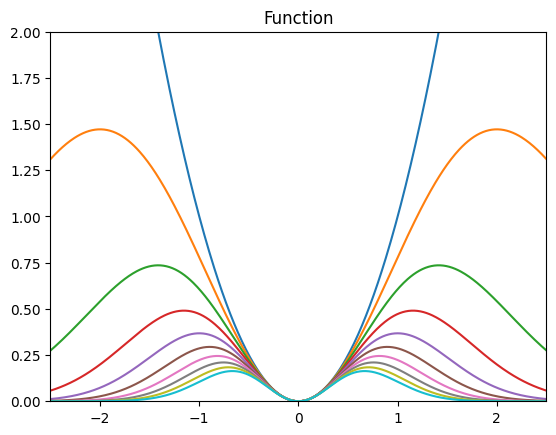

In [28]:
# empirical method
x = np.linspace(-5,5,1001)
asym, xsym = sym.symbols('a x')

a = 0
amax = 2.25

while a <= amax:
  fxa = x**2 * np.exp(a*-x**2)
  fxa_sym = xsym**2 * sym.exp(asym*-xsym**2)

  localmax = find_peaks(fxa)[0]
  localmin = find_peaks(-fxa)[0]

  max_x = abs(x[localmax])

  if len(max_x) > 0 and (max_x[0] == 1 or max_x[0] == 2):
    display(Math('%s \\text{ has critical point at x = }%g' %(sym.latex(fxa_sym.subs(asym,a)), max_x[0])))
  else:
    display(Math('%s \\text{ has NO critical point at x = }%g' %(sym.latex(fxa_sym.subs(asym,a)), 2)))

  plt.plot(x,fxa)

  a += .25

plt.xlim([-2.5,2.5])
plt.ylim([0,2])
plt.title('Function')
plt.show()

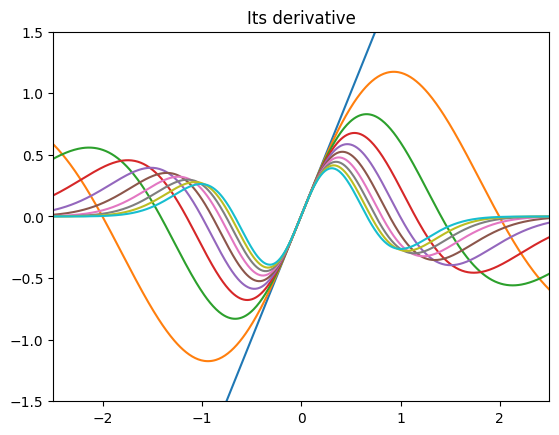

In [29]:
# empirical method
x = np.linspace(-5,5,1001)

a = 0
amax = 2.25

while a <= amax:
  fxa = x**2 * np.exp(a*-x**2)
  fxa_diff = np.diff(fxa) / (x[1]-x[0])

  localmax = find_peaks(fxa)[0]
  localmin = find_peaks(-fxa)[0]

  plt.plot(x[0:-1],fxa_diff)

  a += .25

plt.xlim([-2.5,2.5])
plt.ylim([-1.5,1.5])
plt.title('Its derivative')
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

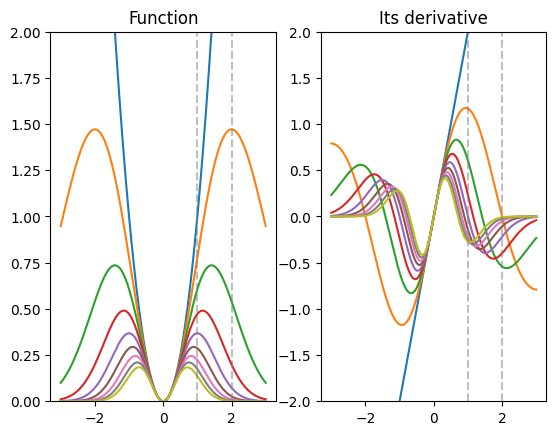

In [7]:
# Their solution
a, x = sym.symbols('a,x')

base_expr = x**2 * sym.exp(-a*x**2)

a_range = np.arange(0,2.25,.25)
x_range = np.linspace(-3,3,1001)

fig,ax = plt.subplots(1,2)

for ai in a_range:
  fx = base_expr.subs(a,ai)
  dfx = sym.diff(fx)
  critpoints = sym.solve(dfx)

  ax[0].plot(x_range,sym.lambdify(x,fx)(x_range))
  ax[1].plot(x_range,sym.lambdify(x,dfx)(x_range))

  critpoints = [round(abs(cp), 10) for cp in critpoints]

  if 1.00 in critpoints:
    display(Math('\\Rightarrow %s \\text{ has a critical point at x = 1!}' %(sym.latex(fx))))
  elif 2.00 in critpoints:
    display(Math('\\Rightarrow %s \\text{ has a critical point at x = 2!}' %(sym.latex(fx))))
  else:
    display(Math('\\Rightarrow %s \\text{ has NO critical points!}' %(sym.latex(fx))))

ax[0].set_title('Function')
ax[0].set_ylim([0,2])
ax[0].plot([1,1], [0,2], '--', color='gray', alpha=.5)
ax[0].plot([2,2], [0,2], '--', color='gray', alpha=.5)

ax[1].set_title('Its derivative')
ax[1].set_ylim([-2,2])
ax[1].plot([1,1], [-2,2], '--', color='gray', alpha=.5)
ax[1].plot([2,2], [-2,2], '--', color='gray', alpha=.5)

plt.show()

# Partial Derivatives

<IPython.core.display.Math object>

<IPython.core.display.Math object>

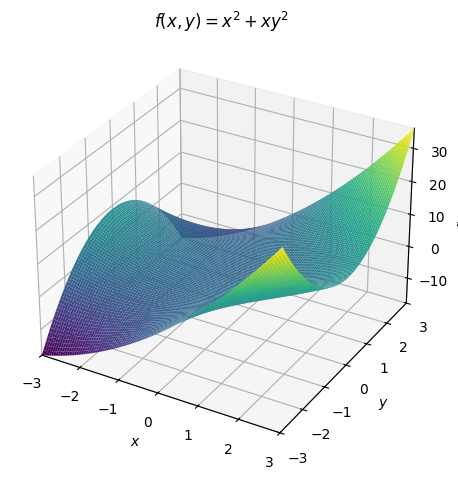

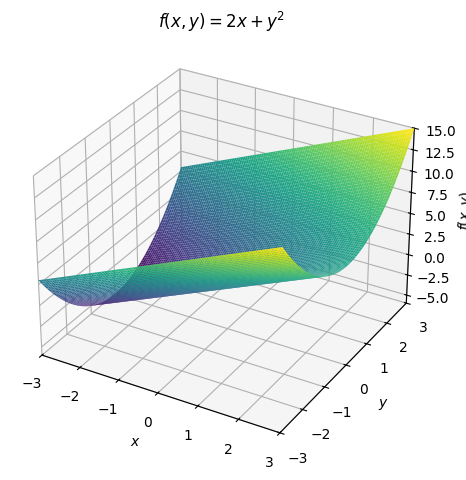

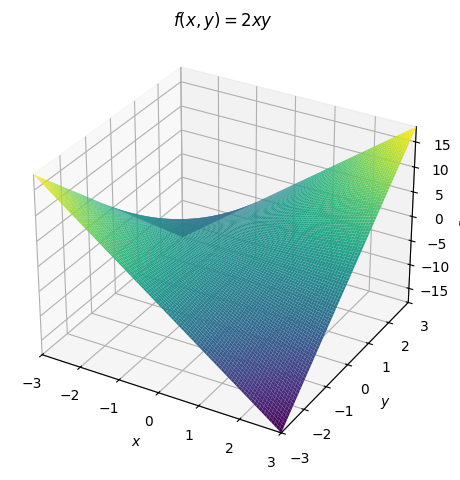

In [19]:
x,y = sym.symbols('x,y')

f = x**2 + x*y**2

display(Math('\\frac{\\partial f}{\\partial x} = %s' %sym.latex(sym.diff(f,x))))
display(Math('\\frac{\\partial f}{\\partial y} = %s' %sym.latex(sym.diff(f,y))))

symplot2.plot3d(f, (x,-3,3), (y,-3,3), title='$f(x,y)=%s$' %sym.latex(f))
symplot2.plot3d(sym.diff(f,x), (x,-3,3), (y,-3,3), title='$f(x,y)=%s$' %sym.latex(sym.diff(f,x)))
symplot2.plot3d(sym.diff(f,y), (x,-3,3), (y,-3,3), title='$f(x,y)=%s$' %sym.latex(sym.diff(f,y)))

plt.show()

# Indefinite and Definite Integrals

x**2/2
1/2


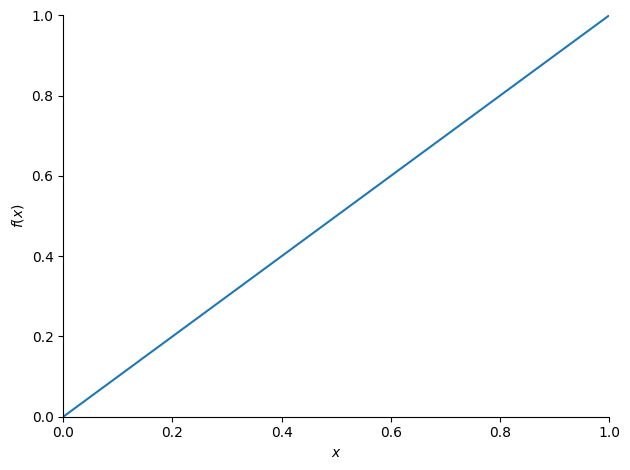

In [5]:
# indefinite integral
x = sym.symbols('x')
f = x
print(sym.integrate(f))

# definite integral
print(sym.integrate(f, (x,0,1)))

p = sym.plotting.plot(f, show=False)
p.xlim = [0,1]
p.ylim = [0,1]
p.show()

x**3/3 + x**2 + 4*x + 8*log(x - 2)


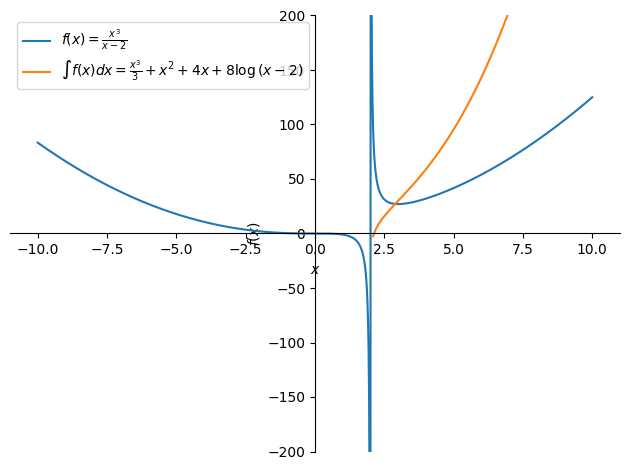

In [14]:
f = x**3 / (x-2)
int_f = sym.integrate(f)
print(int_f)
p = sym.plotting.plot(f, show=False)
p.extend( sym.plotting.plot(int_f, (x,2.1,10), show=False) )

p[0].label = '$f(x) = %s$' %sym.latex(f)
p[1].label = '$\\int f(x) dx = %s$' %sym.latex(int_f)

p.ylim = [-200,200]
p.legend = True
p.show()

In [27]:
x = sym.symbols('x')

fx = 2*x**3 + sym.sin(x)

display(Math('f(x) = %s' %sym.latex(fx)))

df = sym.diff(fx)
display(Math('f\'(x) = %s' %sym.latex(df)))

idf = sym.integrate(df)
display(Math('\\int f\'(x) dx = %s' %sym.latex(idf)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Area between two Curves

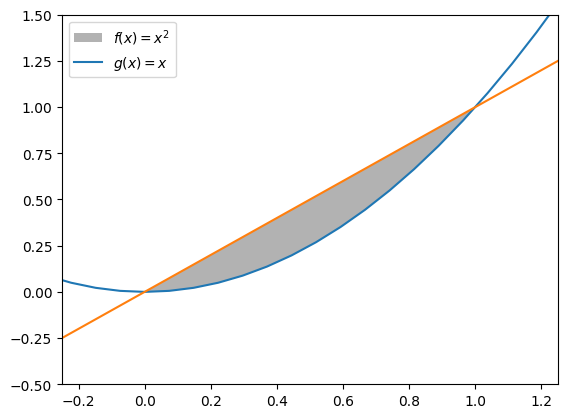

In [43]:
x = sym.symbols('x')

sym_f = x**2
sym_g = x

f = sym.lambdify(x, sym_f)
g = sym.lambdify(x, sym_g)

xx = np.linspace(-2,2,55)

x_patch = np.linspace(0,1,100)
y_patch = np.vstack((g(x_patch), f(x_patch))).T

fig, ax = plt.subplots()
ax.add_patch( Polygon(y_patch,facecolor='k',alpha=.3) )

plt.plot(xx, f(xx))
plt.plot(xx, g(xx))

plt.legend(['$f(x) = %s$' %sym.latex(sym_f), '$g(x) = %s$' %sym.latex(sym_g)])

plt.axis([-.25,1.25,-.5,1.5])

plt.show()